In [2]:
#Importo las librerías

import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import io
from configparser import ConfigParser
import missingno as msno
import sqlite3
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Hago uso de la API de Coincap (https://docs.coincap.io/), para conocer el valor de las criptomonedas, entre otras cosas.

import http.client

conn = http.client.HTTPSConnection("api.coincap.io")
payload = ''
headers = {}
conn.request("GET", "/v2/assets?limit=2000", payload, headers)
res = conn.getresponse()
data = res.read()

In [4]:
#Paso los datos obtenidos de la API a dataframe.

cadena = data.decode('utf-8')
diccionario = pd.read_json(cadena)
lista = json_normalize(diccionario['data'])
df_crypto = pd.DataFrame(lista)
df_crypto.shape
df_crypto.head()

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
0,bitcoin,1,BTC,Bitcoin,19650918.0000000000000000,21000000.0000000000000000,1350210505354.6329041301719274,10217032457.8476544051729300,68709.7928633478041143,-1.2555669966519224,69252.4895472176493065,https://blockchain.info/
1,ethereum,2,ETH,Ethereum,120098097.1310925800000000,None,464122387919.3290640078362253,6249927902.0955260850758453,3864.5274072304259385,-2.3056617554127468,3897.2694274504324779,https://etherscan.io/
2,tether,3,USDT,Tether,102018133001.2660700000000000,None,102095594854.6683954919667035,26403030730.5226301726440346,1.0007592949520196,-0.2425663074590191,1.0022134966684308,https://www.omniexplorer.info/asset/31
3,binance-coin,4,BNB,BNB,166801148.0000000000000000,166801148.0000000000000000,87156538820.9510464509551272,1569533708.8968176458978211,522.5176197285587414,5.5007211113931907,521.8066184760298940,https://etherscan.io/token/0xB8c77482e45F1F44d...
4,solana,5,SOL,Solana,443411873.1595261700000000,None,62574983114.9402802979380541,1097677924.9283584209719029,141.1215777084699207,-4.8080939427388268,143.2127164522761026,https://explorer.solana.com/


In [5]:
#Observo los tipos de variables

df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2000 non-null   object
 1   rank               2000 non-null   object
 2   symbol             2000 non-null   object
 3   name               2000 non-null   object
 4   supply             1894 non-null   object
 5   maxSupply          832 non-null    object
 6   marketCapUsd       958 non-null    object
 7   volumeUsd24Hr      964 non-null    object
 8   priceUsd           1989 non-null   object
 9   changePercent24Hr  927 non-null    object
 10  vwap24Hr           802 non-null    object
 11  explorer           1940 non-null   object
dtypes: object(12)
memory usage: 187.6+ KB


In [6]:
#Paso los datos al tipo correcto

Vector_float = ['supply', 'maxSupply', 'marketCapUsd', 'volumeUsd24Hr', 'priceUsd', 'changePercent24Hr', 'vwap24Hr']
Vector_VC = ['id', 'symbol', 'name', 'explorer']

df_crypto[Vector_float] = df_crypto[Vector_float].astype('float').round(2)
df_crypto[Vector_VC] = df_crypto[Vector_VC].astype('str')
df_crypto['rank'] = df_crypto['rank'].astype('int')

#Agregro una columna de tipo Timestamp, que me resultará útil.

df_crypto['date'] = pd.Timestamp.today()

#df_crypto.info()
print(df_crypto)

                id  rank symbol      name        supply    maxSupply  \
0          bitcoin     1    BTC   Bitcoin  1.965092e+07   21000000.0   
1         ethereum     2    ETH  Ethereum  1.200981e+08          NaN   
2           tether     3   USDT    Tether  1.020181e+11          NaN   
3     binance-coin     4    BNB       BNB  1.668011e+08  166801148.0   
4           solana     5    SOL    Solana  4.434119e+08          NaN   
...            ...   ...    ...       ...           ...          ...   
1995          seer  1996   SEER      SEER           NaN          NaN   
1996      segwit2x  1997    B2X  SegWit2x           NaN   21000000.0   
1997      selfsell  1998    SSC  SelfSell  3.900000e+08          NaN   
1998      senderon  1999   SDRN  Senderon  4.562590e+07          NaN   
1999         senso  2000  SENSO     SENSO  7.026913e+07  715280000.0   

      marketCapUsd  volumeUsd24Hr  priceUsd  changePercent24Hr  vwap24Hr  \
0     1.350211e+12   1.021703e+10  68709.79              -1

In [7]:
#Elimino duplicados (si los hay)

df_crypto.drop_duplicates()

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer,date
0,bitcoin,1,BTC,Bitcoin,1.965092e+07,21000000.0,1.350211e+12,1.021703e+10,68709.79,-1.26,69252.49,https://blockchain.info/,2024-03-11 05:24:53.184034
1,ethereum,2,ETH,Ethereum,1.200981e+08,NaN,4.641224e+11,6.249928e+09,3864.53,-2.31,3897.27,https://etherscan.io/,2024-03-11 05:24:53.184034
2,tether,3,USDT,Tether,1.020181e+11,NaN,1.020956e+11,2.640303e+10,1.00,-0.24,1.00,https://www.omniexplorer.info/asset/31,2024-03-11 05:24:53.184034
3,binance-coin,4,BNB,BNB,1.668011e+08,166801148.0,8.715654e+10,1.569534e+09,522.52,5.50,521.81,https://etherscan.io/token/0xB8c77482e45F1F44d...,2024-03-11 05:24:53.184034
4,solana,5,SOL,Solana,4.434119e+08,NaN,6.257498e+10,1.097678e+09,141.12,-4.81,143.21,https://explorer.solana.com/,2024-03-11 05:24:53.184034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,seer,1996,SEER,SEER,NaN,NaN,NaN,NaN,0.00,NaN,NaN,https://etherscan.io/token/0x0f1ed66c251bcb52e...,2024-03-11 05:24:53.184034
1996,segwit2x,1997,B2X,SegWit2x,NaN,21000000.0,NaN,NaN,4.75,NaN,NaN,http://explorer.b2x-segwit.io/,2024-03-11 05:24:53.184034
1997,selfsell,1998,SSC,SelfSell,3.900000e+08,NaN,NaN,NaN,9.72,NaN,NaN,https://browser.selfsell.com/,2024-03-11 05:24:53.184034
1998,senderon,1999,SDRN,Senderon,4.562590e+07,NaN,NaN,NaN,0.00,NaN,NaN,https://etherscan.io/token/0x73b534fb6f07381a2...,2024-03-11 05:24:53.184034


<Axes: >

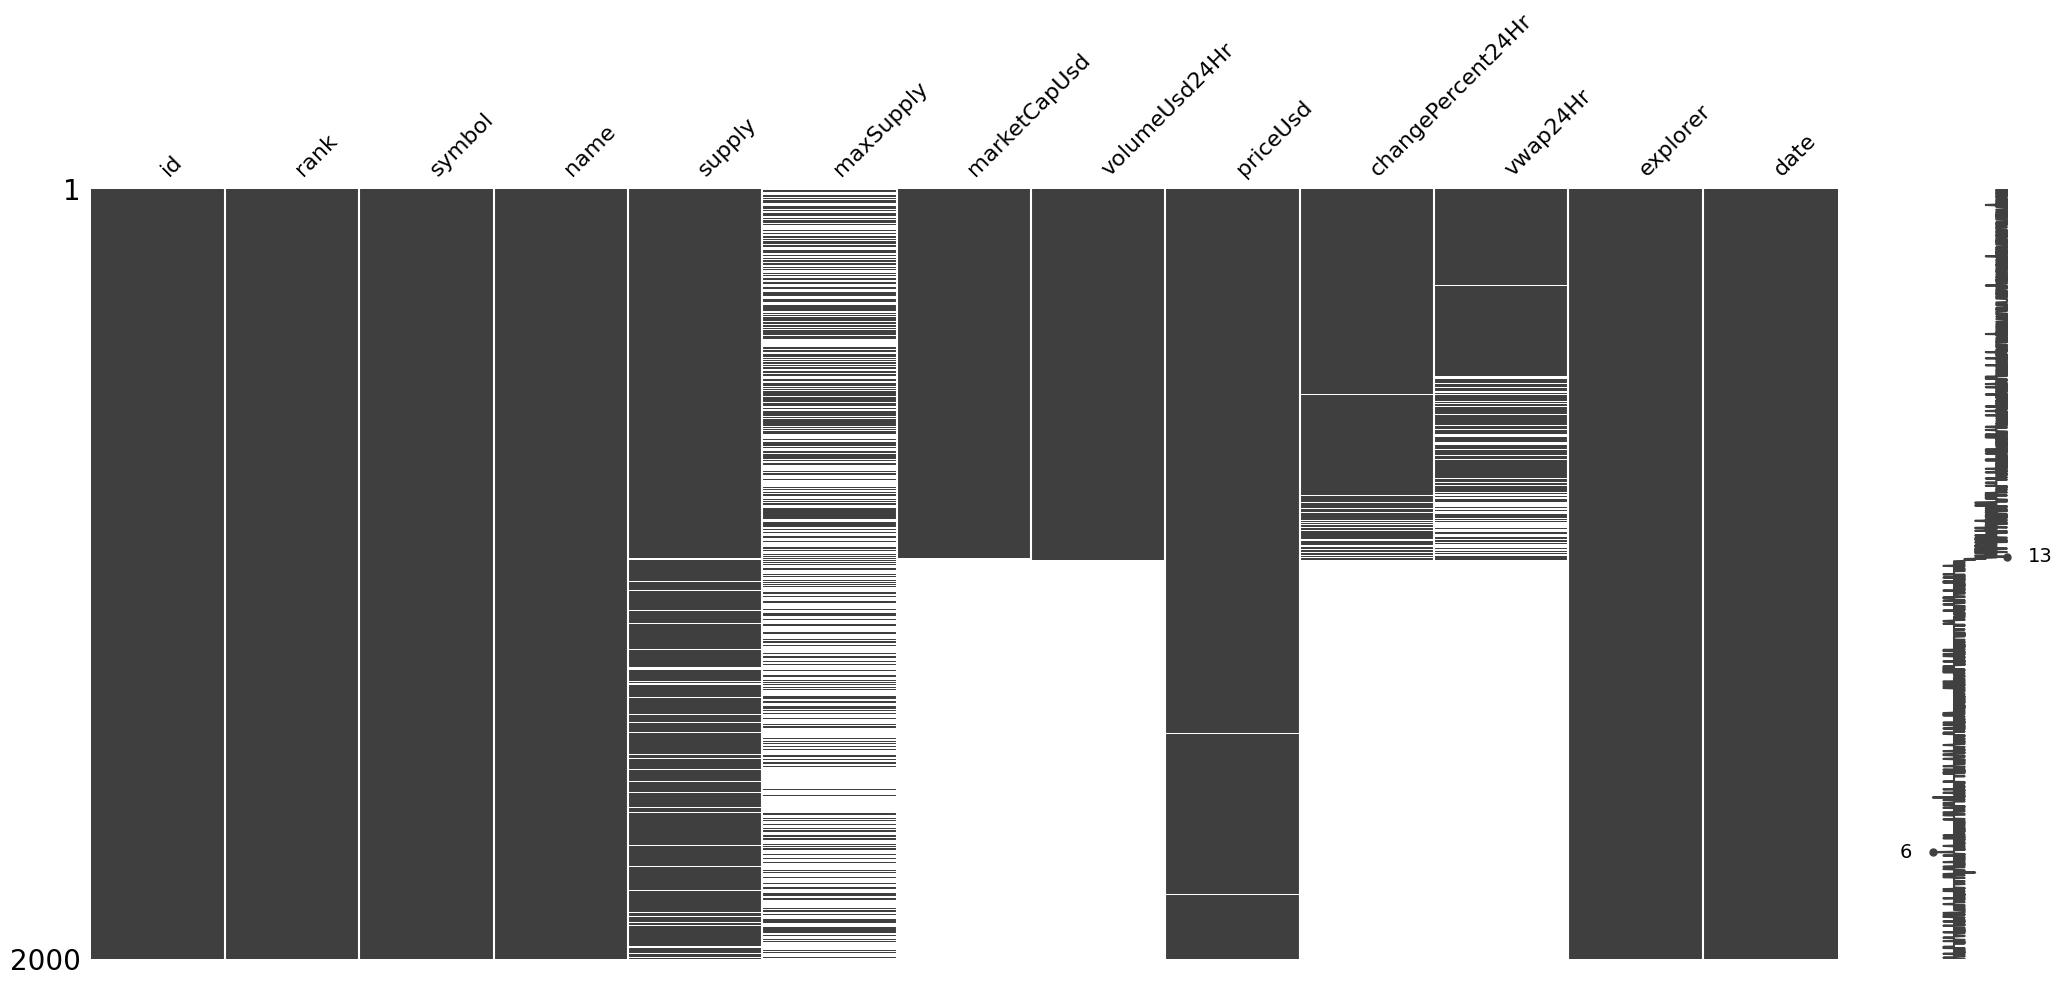

In [8]:
#Visualizo los datos nulos con Missingno, en este caso, los datos faltantes son las lineas blancas.

msno.matrix(df_crypto)

<Axes: >

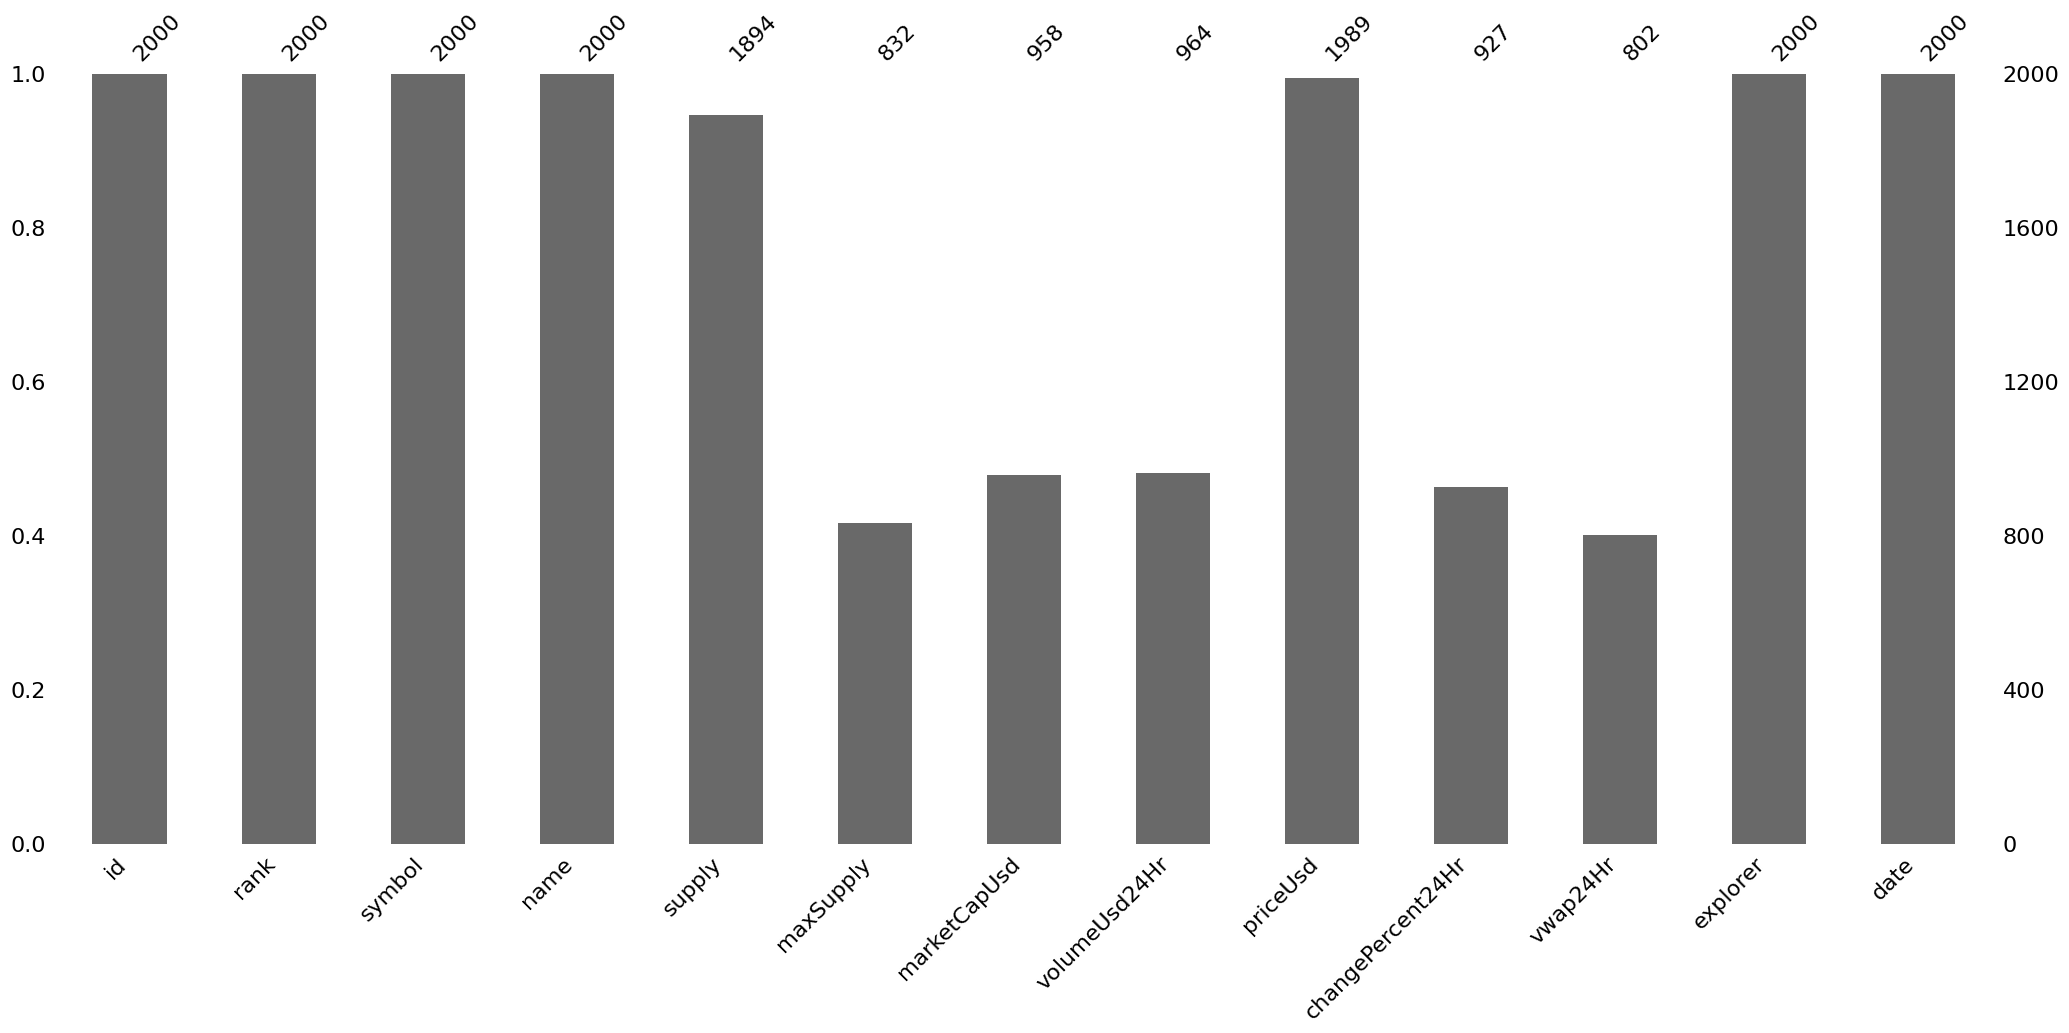

In [9]:
#Según el tamaño de las barras puede observar qué features tienen más datos faltantes, m,ientras más corta sea la barra, más datos le faltan.

msno.bar(df_crypto)

<Axes: >

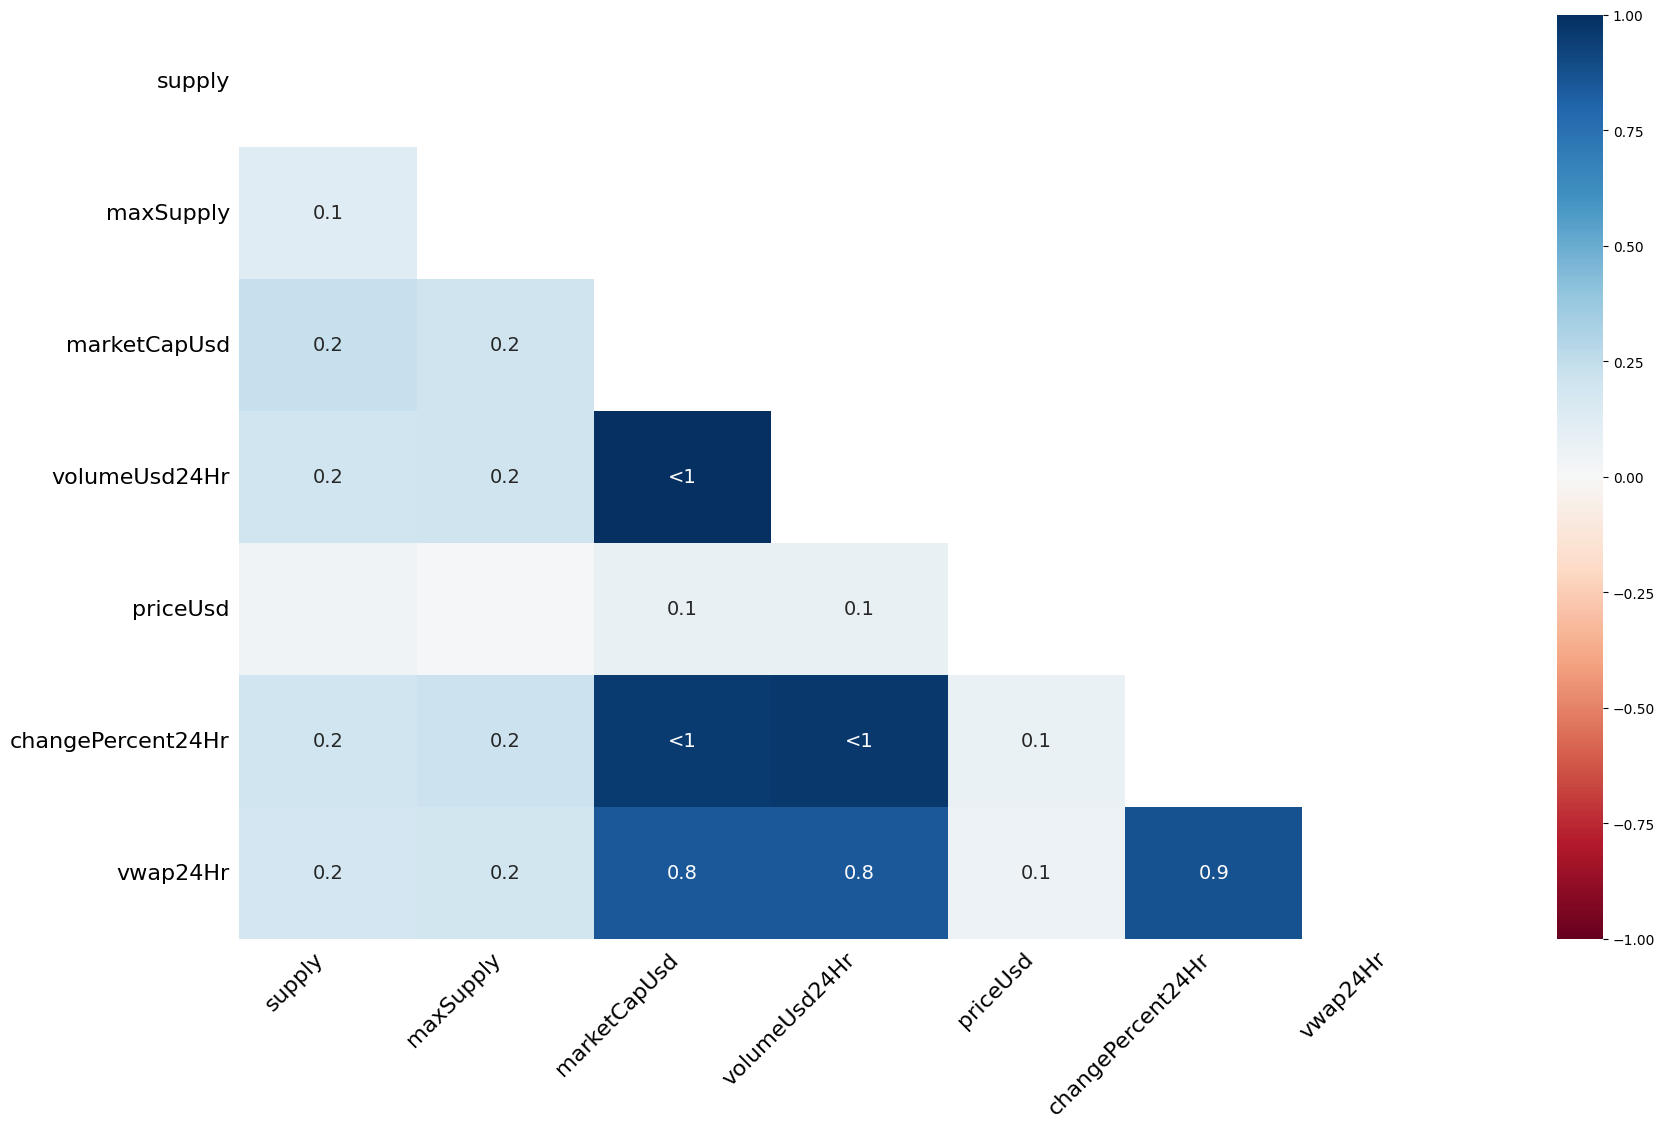

In [10]:
#Puede verse que, en este set de datos, hay una fuerte correlación entre algunas variables

msno.heatmap(df_crypto)

<Axes: >

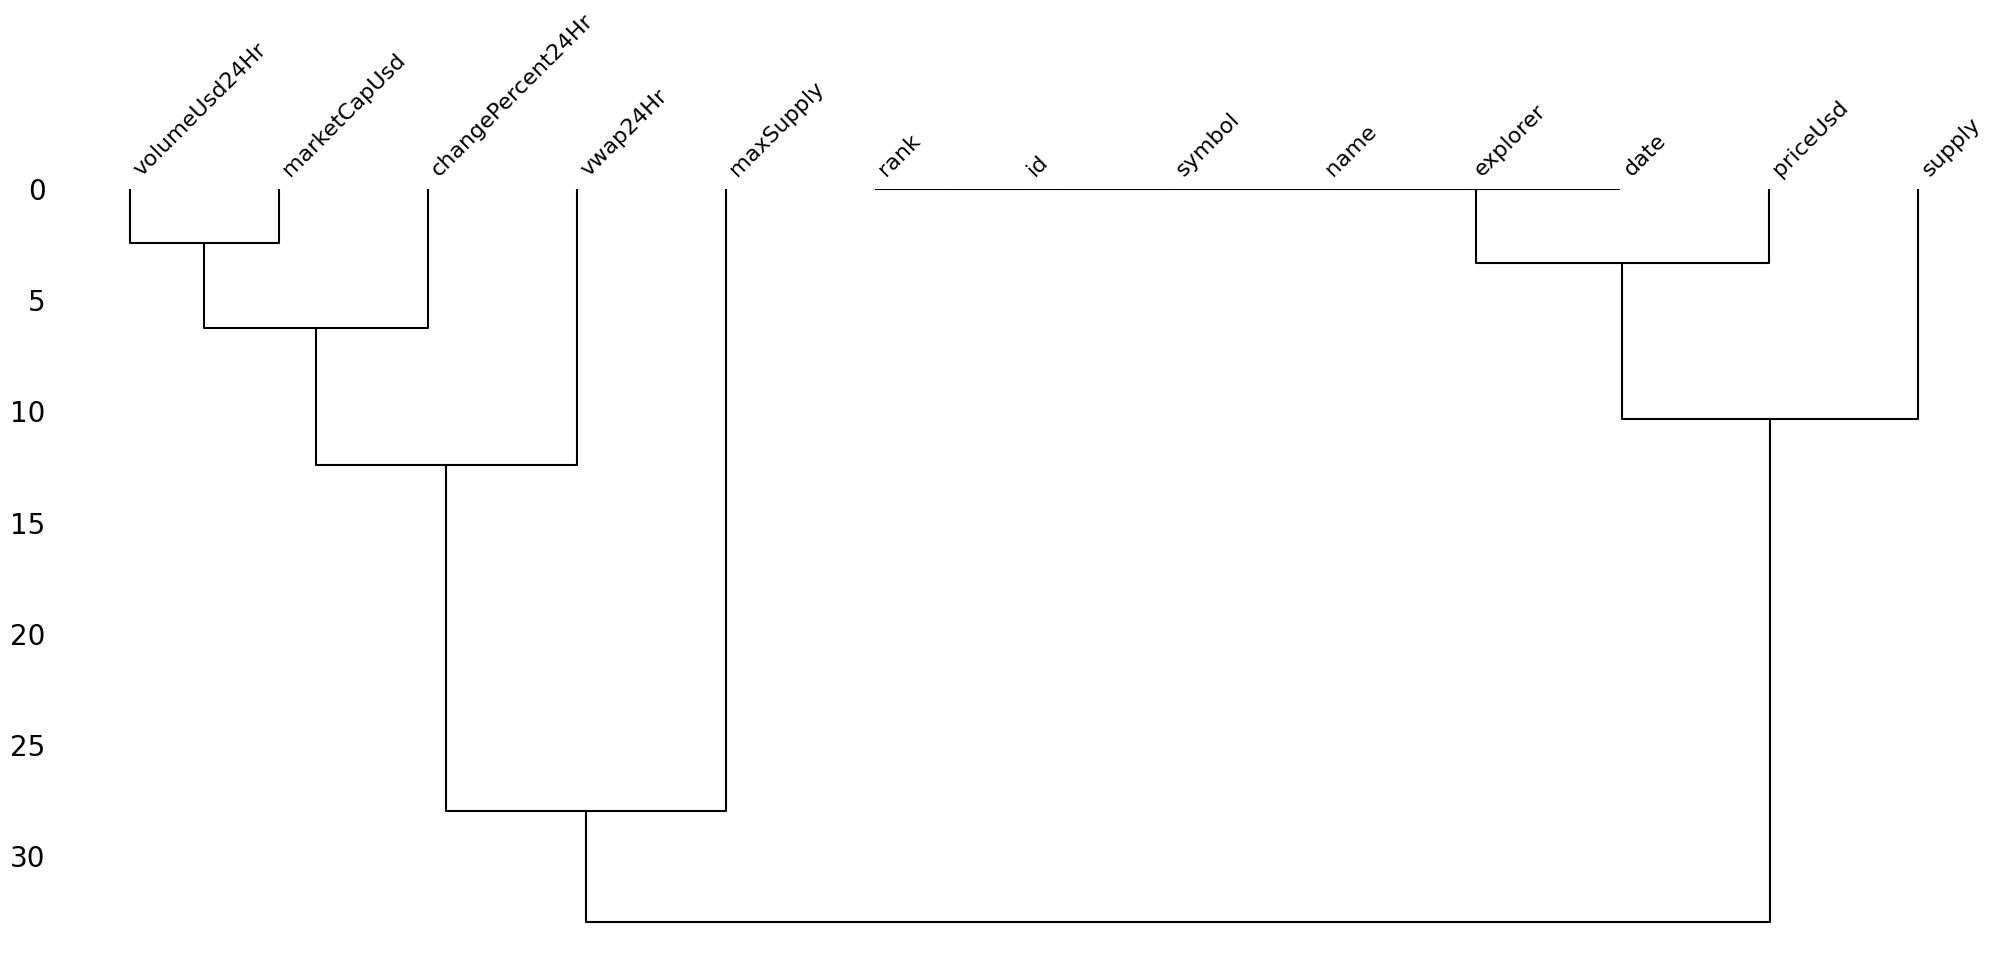

In [11]:
# Aquí se agrupan los features con patrones de ausencia de datos similares.

msno.dendrogram(df_crypto)

In [12]:
#Observando la matriz y el heatmap, puede verse que marketCapUsd, volumeUsd24Hr, changePercent24Hr y vwap24Hr, tienen una correlación de datos faltantes.
#Por lo tanto, puedo asumir que los datos faltantes son del tipo MCAR o MAR, por lo que sustituyo por la mediana.
#Verifico los nulos y los reemplazo por la mediana, que es más robusta que la media.

df_crypto.isnull().sum()

columnas = ['supply', 'maxSupply', 'marketCapUsd', 'volumeUsd24Hr', 'priceUsd', 'changePercent24Hr', 'vwap24Hr']

#Observo que el dataframe tiene el valor "None" en la columna supply, también debo hacer tratamiento de nulos

df_crypto['supply'] = df_crypto['supply'].replace('None', pd.NA)

valores_medios = df_crypto[columnas].median()

df_crypto.fillna(valores_medios, inplace = True)

print(df_crypto)

                id  rank symbol      name        supply    maxSupply  \
0          bitcoin     1    BTC   Bitcoin  1.965092e+07   21000000.0   
1         ethereum     2    ETH  Ethereum  1.200981e+08  331100000.0   
2           tether     3   USDT    Tether  1.020181e+11  331100000.0   
3     binance-coin     4    BNB       BNB  1.668011e+08  166801148.0   
4           solana     5    SOL    Solana  4.434119e+08  331100000.0   
...            ...   ...    ...       ...           ...          ...   
1995          seer  1996   SEER      SEER  4.343033e+07  331100000.0   
1996      segwit2x  1997    B2X  SegWit2x  4.343033e+07   21000000.0   
1997      selfsell  1998    SSC  SelfSell  3.900000e+08  331100000.0   
1998      senderon  1999   SDRN  Senderon  4.562590e+07  331100000.0   
1999         senso  2000  SENSO     SENSO  7.026913e+07  715280000.0   

      marketCapUsd  volumeUsd24Hr  priceUsd  changePercent24Hr   vwap24Hr  \
0     1.350211e+12   1.021703e+10  68709.79              -

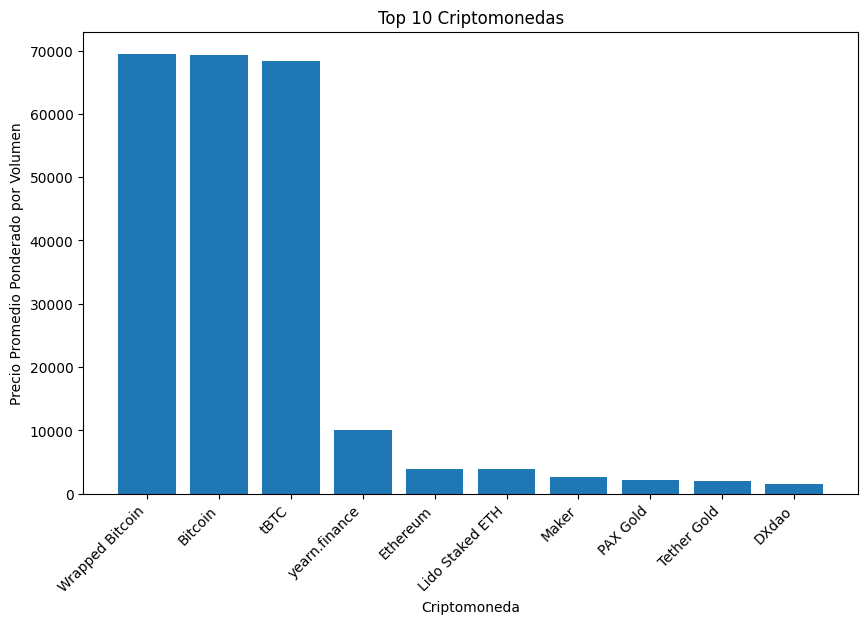

In [13]:
#Creo un top 10 para que el gráfico sea legible.

top_10_criptomonedas = df_crypto.sort_values(by='vwap24Hr', ascending=False).head(10)

# Creo el gráfico de barras para visualizar los datos, en este caso, grafico Criptomonedas vs Precio Promedio Ponderado por Volumen en las últimas 24 horas.

plt.figure(figsize=(10, 6))
plt.bar(top_10_criptomonedas['name'], top_10_criptomonedas['vwap24Hr'])
plt.xlabel('Criptomoneda')
plt.ylabel('Precio Promedio Ponderado por Volumen')
plt.title('Top 10 Criptomonedas')
plt.xticks(rotation=45, ha='right')

# Muestro el gráfico

plt.show()



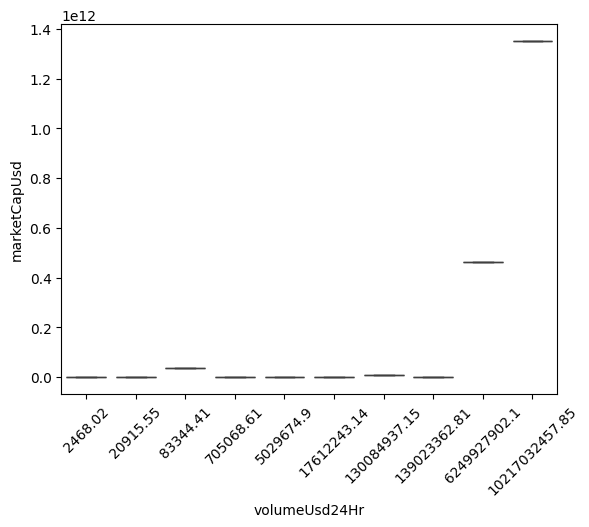

In [24]:
#sns.lineplot(x = 'changePercent24Hr', y = 'volumeUsd24Hr', data = top_10_criptomonedas)
sns.boxplot(data = top_10_criptomonedas, x = 'volumeUsd24Hr', y = 'marketCapUsd')
plt.xticks(rotation=45)
plt.show()

In [80]:
#Inserto los datos obtenidos en una base de datos SQLite


ruta_db = '/content/gdrive/MyDrive/Database/database_crypto.db'

conn = sqlite3.connect(ruta_db)

#Creo el ID

df_crypto['Id_Crypto'] = range(1, 1 + len(df_crypto))

#Creo la tabla

crear_tabla = '''
CREATE TABLE IF NOT EXISTS tabla_crypto (
       id TEXT,
       rank INTEGER,
       symbol TEXT,
       name TEXT,
       supply REAL,
       maxSupply REAL,
       marketCapUsd REAL,
       volumeUsd24Hr REAL,
       priceUsd REAL,
       changePercent24Hr REAL,
       vwap24Hr REAL,
       explorer TEXT,
       date TEXT,
       Id_Crypto INTEGER PRIMARY KEY
)
'''

#Inserto los datos del dataframe en una tabla.

df_crypto.to_sql('tabla_crypto', conn, index=False, if_exists='replace')

#Creo una consulta para ver id, nombre y precio en dólares

consulta = ''' SELECT id, name, priceUSD FROM tabla_crypto'''

cursor = conn.execute(consulta)

resultados = cursor.fetchall()

# Imprime los resultados

for fila in resultados:
    print(fila)

conn.close()


('bitcoin', 'Bitcoin', 67951.26)
('ethereum', 'Ethereum', 3821.52)
('tether', 'Tether', 1.0)
('binance-coin', 'BNB', 515.0)
('solana', 'Solana', 139.72)
('usd-coin', 'USDC', 1.0)
('xrp', 'XRP', 0.6)
('cardano', 'Cardano', 0.7)
('dogecoin', 'Dogecoin', 0.16)
('shiba-inu', 'Shiba Inu', 0.0)
('avalanche', 'Avalanche', 41.02)
('polkadot', 'Polkadot', 10.04)
('chainlink', 'Chainlink', 21.52)
('polygon', 'Polygon', 1.2)
('tron', 'TRON', 0.13)
('wrapped-bitcoin', 'Wrapped Bitcoin', 68161.27)
('uniswap', 'Uniswap', 13.86)
('bitcoin-cash', 'Bitcoin Cash', 412.43)
('litecoin', 'Litecoin', 85.51)
('internet-computer', 'Internet Computer', 13.74)
('near-protocol', 'NEAR Protocol', 5.77)
('filecoin', 'Filecoin', 10.35)
('multi-collateral-dai', 'Multi Collateral DAI', 1.0)
('unus-sed-leo', 'UNUS SED LEO', 5.69)
('ethereum-classic', 'Ethereum Classic', 34.99)
('stacks', 'Stacks', 2.87)
('render-token', 'Render Token', 11.03)
('crypto-com-coin', 'Crypto.com Coin', 0.16)
('the-graph', 'The Graph', 0.42